# Power Laws
   * Power laws describe mathematical relationships between two variables in the form Y = kX^α, where α is a constant exponent that determines the shape of the curve.
   * They are often observed in situations where a few highly connected nodes dominate the system, while the majority have only a few connections.
   * Power laws exhibit a long tail, meaning there are relatively few occurrences of very large values that can have a significant impact on the overall distribution.
   * They are useful for understanding complex systems and predicting their behavior, but must be used with caution as they may not always apply and can be misinterpreted if not applied correctly.

# Box-Cox Transformation
![Box-Cox transform formula](https://latex.codecogs.com/svg.latex?\large&space;y(\lambda)=\begin{cases}\frac{(y+\epsilon)^{\lambda}-1}{\lambda},&amp;\lambda\neq0\\ \ln(y+\epsilon),&\lambda=0\end{cases})

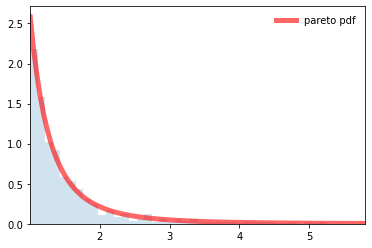

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import pareto

fig, ax = plt.subplots(1, 1)
b = 2.62
mean, var, skew, kurt = pareto.stats(b, moments='mvsk')
x = np.linspace(pareto.ppf(0.01, b),
                pareto.ppf(0.99, b), 100)
ax.plot(x, pareto.pdf(x, b),
       'r-', lw=5, alpha=0.6, label='pareto pdf')

vals = pareto.ppf([0.001, 0.5, 0.999], b)
r = pareto.rvs(b, size=1000)
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

In [2]:
def box_cox(X, lam):
  if lam == 0:
    return np.log(X)
  return (np.power(X, lam) - 1)/lam

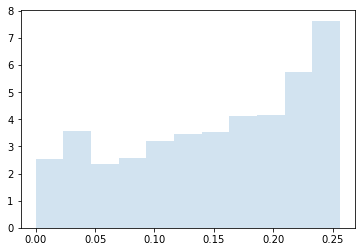

In [3]:
lam = -3.9
fig, ax = plt.subplots(1, 1)
ax.hist(box_cox(r, lam), density=True, bins='auto', histtype='stepfilled', alpha=0.2)
plt.show()

# Quantilie transformation
![Quantile transform formula](https://latex.codecogs.com/svg.latex?\large&space;y_i=\frac{F^{-1}(x_i)-F^{-1}(0)}{F^{-1}(1)-F^{-1}(0)})
1. Rank the data in ascending order.
2. Replace each value with its corresponding percentile rank.
3. Transform the uniform distribution to the desired distribution using the inverse cumulative distribution function (CDF).
4. The resulting transformed variable has the same range and number of observations as the original variable, but with a different distribution.
5. Quantile transformation is particularly useful when the original variable has a skewed or non-normal distribution, making it difficult to model using standard statistical methods such as linear regression.
6. One potential limitation of quantile transformation is that it can be sensitive to outliers, so it may be necessary to either remove outliers or apply a more robust transformation method.

# Row normalization
![Row normalization formula](https://latex.codecogs.com/svg.latex?\large&space;X_{ij}=\frac{X_{ij}}{\sum_{k=1}^{n}X_{ik}})
Even after normalizing features, rows have different sizes. Row normalization “fixes” this by ensuring every row’s norm is the same (i.e., sums to 1, or using a different norm)
![Row normalization effect](./assets/row_trans.png)

# Column normalization
 A method used to scale the values of a dataset so that they fall within a specific range. Unlike row normalization, which scales the values within each row, column normalization scales the values within each column. This can be useful when working with datasets that have features with vastly different scales, as it can help to ensure that each feature is given equal weight in the analysis.
 ## Min-Max Normalization
![Min-Max Normalization formula](https://latex.codecogs.com/svg.latex?\large&space;X_{ij}=\frac{X_{ij}-\min(X_{ij})}{\max(X_{ij})-\min(X_{ij})})
 ## Z-Score Normalization
![Z-Score Normalization formula](https://latex.codecogs.com/svg.latex?\large&space;X_{ij}=\frac{X_{ij}-\mu}{\sigma})


# Bag of Words
The bag-of-words (BoW) model is a common technique in natural language processing for representing text data as a collection of word counts. It involves creating a vocabulary of unique words from a corpus of text documents and representing each document as a vector of word frequencies. The BoW model can be used for tasks such as document classification, information retrieval, and sentiment analysis.

In [5]:
import re
from collections import defaultdict

def build_bag_of_words(document):
    document = document.lower()
    words = re.findall(r'\w+', document)
    bow = defaultdict(lambda: 0)
    for word in words:
        bow[word] += 1
    return dict(bow)

# Word embeddings
Word embeddings are a type of word representation that allows words with similar meaning to have a similar representation. They are an improvement over simpler bag-of-words model representations that assign a one-hot encoded vector of a fixed size to each word, where the vector is all zeros except for the index of the word, which is marked with a 1. Word embeddings are learned from text data and are comprised of a floating point vector of a fixed size. The values in the vector are learned in such a way that words that have similar meaning will have a similar representation. Word embeddings can be learned using a variety of techniques, such as neural word embedding models like word2vec or GloVe.
## Word2Vec
Word2Vec is a popular technique for representing words as high-dimensional vectors in natural language processing. It uses a neural network to learn distributed representations of words based on their co-occurrence patterns in a large corpus of text. The resulting vector space can capture semantic relationships between words and be used for tasks such as language modeling, named entity recognition, and machine translation.

# Feature selection
* Key ideas:
1. choose features that correlate with the class
2. choose features that explain a large part of the data variance
3. choose those that do not correlate with already selected ones
4. choose those that lead to the best performance
* Selection can use greedy or optimization algorithms
* All require some kind of stopping condition/parameter
* A common set-up is to use a search-wrapper

# Encodings
## Label encoding
a method used in data preprocessing to convert categorical variables into
numerical values. Each unique category is assigned a unique integer value, allowing the data to
be more easily processed by machine learning algorithms. However, it is important to note that
label encoding does not capture any inherent relationships between the categories, and can
sometimes lead to incorrect assumptions being made about the data.
## Target encoding
Sorting features according to their positive class probability can be a useful way to perform
target encoding. This involves calculating the probability of the positive class for each category
in the categorical variable and sorting the categories based on this probability. The categories
with the highest probability of belonging to the positive class are assigned higher numerical
values, while those with lower probabilities are assigned lower numerical values. This method
can be effective in cases where the relationship between the categorical variable and the target
variable is complex, as it allows the machine learning algorithm to capture this complexity.
## One hoc encoding
In machine learning, one-hot encoding is a technique used to convert categorical data into a
format that can be more easily processed by machine learning algorithms. It works by creating a
binary vector for each category in the data, with a 1 indicating that the category is present and a
0 indicating that it is not. This allows the machine learning algorithm to treat each category as a
separate feature, rather than trying to interpret the categories as a single numerical value. OnePreprocessing
5
hot encoding is particularly useful when working with categorical data that has a large number of
categories, as it can help to reduce the dimensionality of the data and improve the performance
of the machine learning algorithm.
## Binning
Binning is a data transformation method that involves dividing a continuous variable into a set
of discrete bins or intervals. This can be useful for reducing the impact of outliers, simplifying
complex data, and making it easier to compare data across different groups or categories.
Binning can be done using a variety of methods, such as equal width or equal frequency
binning. However, it is important to choose the appropriate bin size and method carefully, as this
can significantly impact the results of any subsequent analysis.

# Feature manipulation
## Feature addition
Feature addition involves adding new features to a dataset that may improve the performance of
machine learning algorithms. These new features could be derived from existing features, or they
could be completely new features that are relevant to the problem being solved. Feature addition
can be a useful technique when working with datasets that have low dimensionality or that do not
contain enough information to accurately predict the target variable.
Feature Extraction
## Feature extraction
Feature extraction involves transforming raw data into a set of features that can be used in
machine learning algorithms. This can involve techniques such as dimensionality reduction,
clustering, and principal component analysis. Feature extraction is particularly useful when working
with datasets that have high dimensionality or that contain a large amount of noise or irrelevant
data. By extracting relevant features, we can improve the performance of machine learning
algorithms and make them more efficient at solving the problem at hand.


# SMOTE
SMOTE (Synthetic Minority Over-sampling Technique) is a method used in machine learning to
deal with imbalanced datasets. It works by generating synthetic data points for the minority class in
the dataset, which helps to balance the class distribution and improve the performance of machine
learning algorithms. The SMOTE algorithm works by selecting a random minority data point and
generating a new data point by interpolating between the nearest minority data points. This process
is repeated until the desired level of oversampling has been achieved. SMOTE is a powerful tool for
dealing with imbalanced datasets, but it is important to use it carefully and avoid overfitting to the
minority class.
Steps:
1. For every minority instance i
2. Randomly select one of the k nearest neighbours x
Preprocessing 6
3. Compute the vector v(i,x) between i and x
*  i + v(i, x) = x
4. Randomly select a point p along this vector
*  p = i + rand(0, 1) * v(i, x)
5. Add p to the minority instances

In [6]:
def smote(minoritySet, nSamples=1, k=5):
	neighbours = np.random.randint(1,k,(nSamples))
	scalars = np.random.rand(nSamples)
	for i in range(nSamples):
		b = np.random.randint(0,len(minoritySet)-1,)
		distances = np.linalg.norm(minoritySet - minoritySet[b,:], axis=1)
		asc_neighbours = np.argsort(distances)
		new_point = (minoritySet[asc_neighbours[neighbours[i]]] - minoritySet[b])*scalars[i] + minoritySet[b]
		minoritySet = np.append(minoritySet, new_point[np.newaxis, :], 0)
	return minoritySet

# Tomek Links
A pair of instances from different classes that are closest to each other. They are
often used for undersampling in imbalanced datasets, as removing them can improve the separation
between classes. The Tomek Links algorithm works by identifying all pairs of instances that are
Tomek Links and removing the majority instance from each pair. This can be an effective method for
improving the performance of machine learning algorithms on imbalanced datasets, but it is
important to use it carefully and avoid removing too many instances.
# Missing values
Imputation → replacing missing values
Hot-deck – replace with values from similar rows
Cold-deck – replace with values from another dataset
Mean substitution – replace with the mean value of the feature
Matrix factorization – reduce the dimension, treating ? as latent
Regression/prediction – predict the values form available data
Multiple imputation – it is wrong to find a point-estimate..